# Landscape Setup

In this demo, we will generate a landscape on Euclidean geometry.

## Loading Libraries

In [1]:
import os; os.environ['PROJ_LIB']='/path/to/env/share/proj'
from os import path
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MGSurvE as srv
%matplotlib inline
###############################################################################
# Setup path and ID
###############################################################################
(ID, OUT_PTH) = ('landscape_setup', '../out/')
srv.makeFolder(OUT_PTH)

## Habitats and Traps

### Habitats

In [2]:
PTS_NUM = 150
RADII = (75, 100)

xy = srv.ptsDonut(PTS_NUM, RADII).T
pType = np.random.choice(1, xy.shape[1])
points = pd.DataFrame({'x': xy[0], 'y': xy[1], 't': pType})

### Traps

In [3]:
nullTraps = [0, 0, 0, 0, 0]
traps = pd.DataFrame({
    'x': nullTraps, 'y': nullTraps, 'sid': nullTraps,
    't': [0, 0, 0, 1, 1], 
    'f': [0, 0, 0, 0, 0]
})
tKer = {
    0: {'kernel': srv.exponentialDecay, 'params': {'A': .5, 'b': .1}},
    1: {'kernel': srv.exponentialDecay, 'params': {'A': .5, 'b': .125}}
}

### Landscape

In [4]:
lnd = srv.Landscape(
    points, 
    kernelParams={'params': srv.MEDIUM_MOV_EXP_PARAMS, 'zeroInflation': .25}, 
    traps=traps, trapsKernels=tKer
)

(<Figure size 1500x1500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28560b2b0>)

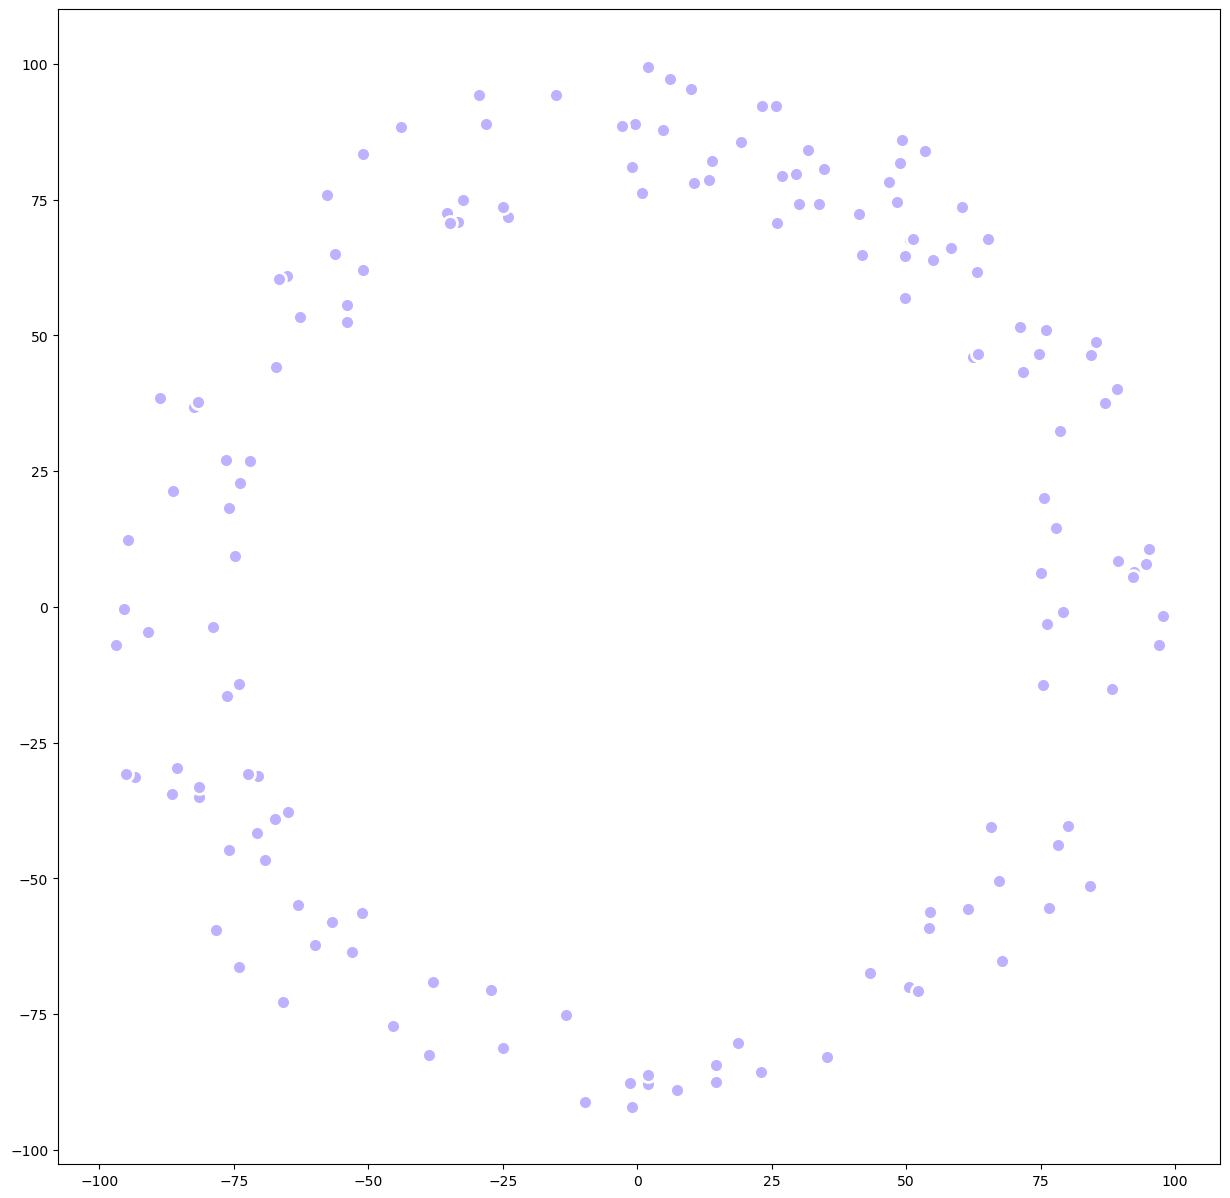

In [5]:
(fig, ax) = plt.subplots(1, 1, figsize=(15, 15), sharey=False)
lnd.plotSites(fig, ax, size=100)